## KL Divergence

Kullback–Leibler divergence

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats

In [5]:

import sympy as sp

### Gaussians

Generate Gaussian data

In [6]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [7]:
stats.norm.ppf(0.99)

2.3263478740408408

In [8]:
x = np.linspace(
    -10,
    10, 
    10000
)


In [9]:
y = stats.norm.pdf(x)
y_a = stats.norm.pdf(x, 3)

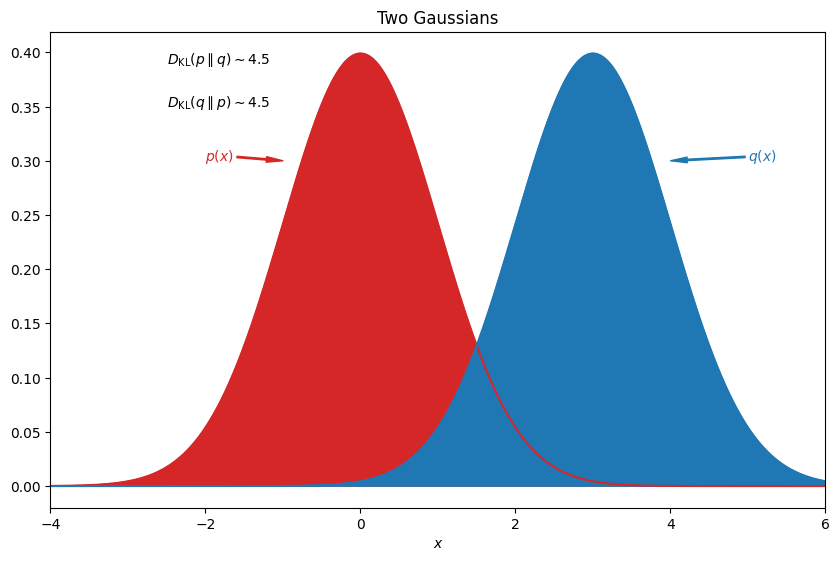

In [10]:
fig, ax = plt.subplots(figsize=(10,6.18))

ax.plot(x, y, color="tab:red")
ax.plot(x, y_a, color="tab:blue")

ax.fill_between(x, y, color="tab:red")
ax.fill_between(x, y_a, color="tab:blue")

ax.set_xlim([-4,6])
ax.set_xlabel("$x$")
ax.set_title("Two Gaussians")

ax.annotate('$p(x)$', xy=(-1, 0.3), xytext=(-2, 0.3),
            arrowprops=dict(color='tab:red', shrink=0.001, width=1, headwidth=4),
            color="tab:red"
           )

ax.annotate('$q(x)$', xy=(4, 0.3), xytext=(5, 0.3),
            arrowprops=dict(color='tab:blue', shrink=0.001, width=1, headwidth=4),
            color="tab:blue"
           )

ax.text(-2.5, 0.39, r"$D_\mathrm{KL}(p\parallel q)\sim 4.5$")
ax.text(-2.5, 0.35, r"$D_\mathrm{KL}(q\parallel p)\sim 4.5$")

plt.savefig("assets/kl-divergence/two-gaussians.png")

In [11]:
stats.entropy(y, y_a)

4.499999999998729

In [12]:
stats.entropy(y_a, y)

4.499999999974058

Investigate $\log(\frac{y}{y_a})$

In [13]:
np.min(y/y_a)

8.423463754468646e-12

In [14]:
np.max(y/y_a)

961965785544776.4

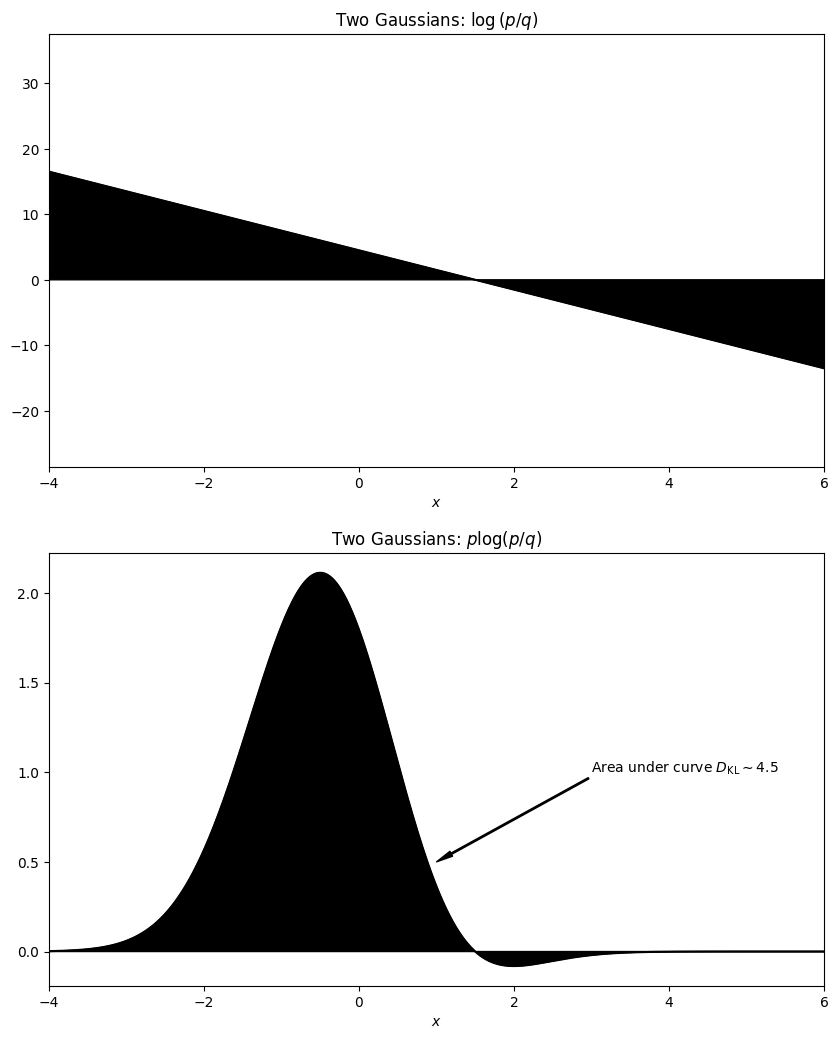

In [15]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(10,2*6.18))

ax[0].plot(x, np.log(y/y_a), color="k")

ax[0].fill_between(x, np.log(y/y_a), color="k")

ax[0].set_xlim([-4,6])
ax[0].set_xlabel("$x$")
ax[0].set_title(r"Two Gaussians: $\log\left(p/q\right)$")

ax[1].plot(x, y*np.log(y/y_a), color="k")

ax[1].fill_between(x, y*np.log(y/y_a), color="k")

ax[1].set_xlim([-4,6])
ax[1].set_xlabel("$x$")
ax[1].set_title("Two Gaussians: $p \log(p/q)$")

ax[1].annotate(r'Area under curve $D_\mathrm{KL} \sim 4.5$', xy=(1, 0.5), xytext=(3, 1),
            arrowprops=dict(color='k', shrink=0.001, width=1, headwidth=4),
            color="k"
           )

plt.savefig("assets/kl-divergence/integrants.png")

In [16]:
np.sum(
    ((x.max() - x.min())/len(x))*y*np.log(y/y_a)
)

4.49955

## A Guassian mixture

In [17]:
y_b = stats.norm.pdf(x)/2 + stats.norm.pdf(x, 3)/2

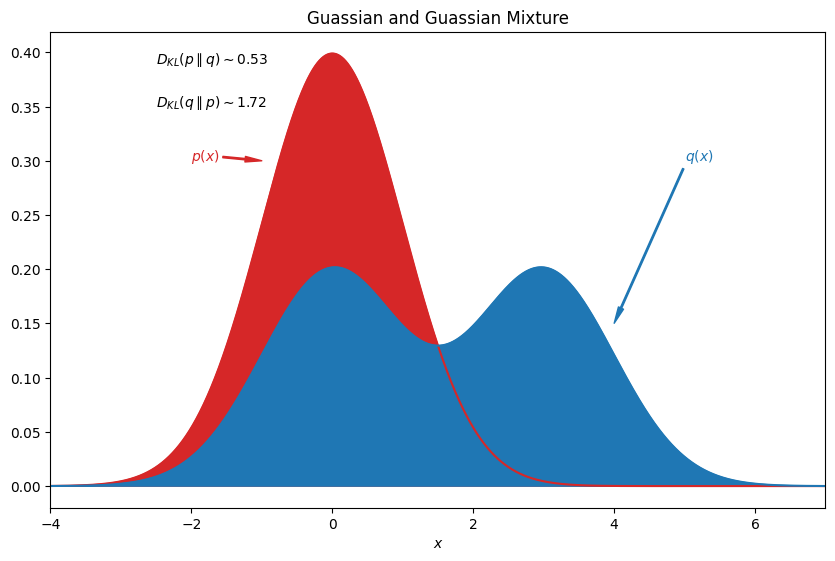

In [18]:
fig, ax = plt.subplots(figsize=(10,6.18))

ax.plot(x, y, color="tab:red")
ax.plot(x, y_b, color="tab:blue")

ax.fill_between(x, y, color="tab:red")
ax.fill_between(x, y_b, color="tab:blue")

ax.set_xlim([-4,7])
ax.set_xlabel("$x$")
ax.set_title("Guassian and Guassian Mixture")

ax.annotate('$p(x)$', xy=(-1, 0.3), xytext=(-2, 0.3),
            arrowprops=dict(color='tab:red', shrink=0.001, width=1, headwidth=4),
            color="tab:red"
           )

ax.annotate('$q(x)$', xy=(4, 0.15), xytext=(5, 0.3),
            arrowprops=dict(color='tab:blue', shrink=0.001, width=1, headwidth=4),
            color="tab:blue"
           )

ax.text(-2.5, 0.39, r"$D_{KL}(p\parallel q)\sim 0.53$")
ax.text(-2.5, 0.35, r"$D_{KL}(q\parallel p)\sim 1.72$")

plt.savefig("assets/kl-divergence/guassian-mixture.png")

In [19]:
stats.entropy(y, y_b)

0.526777306520738

In [20]:
stats.entropy(y_b, y)

1.7232226934643318

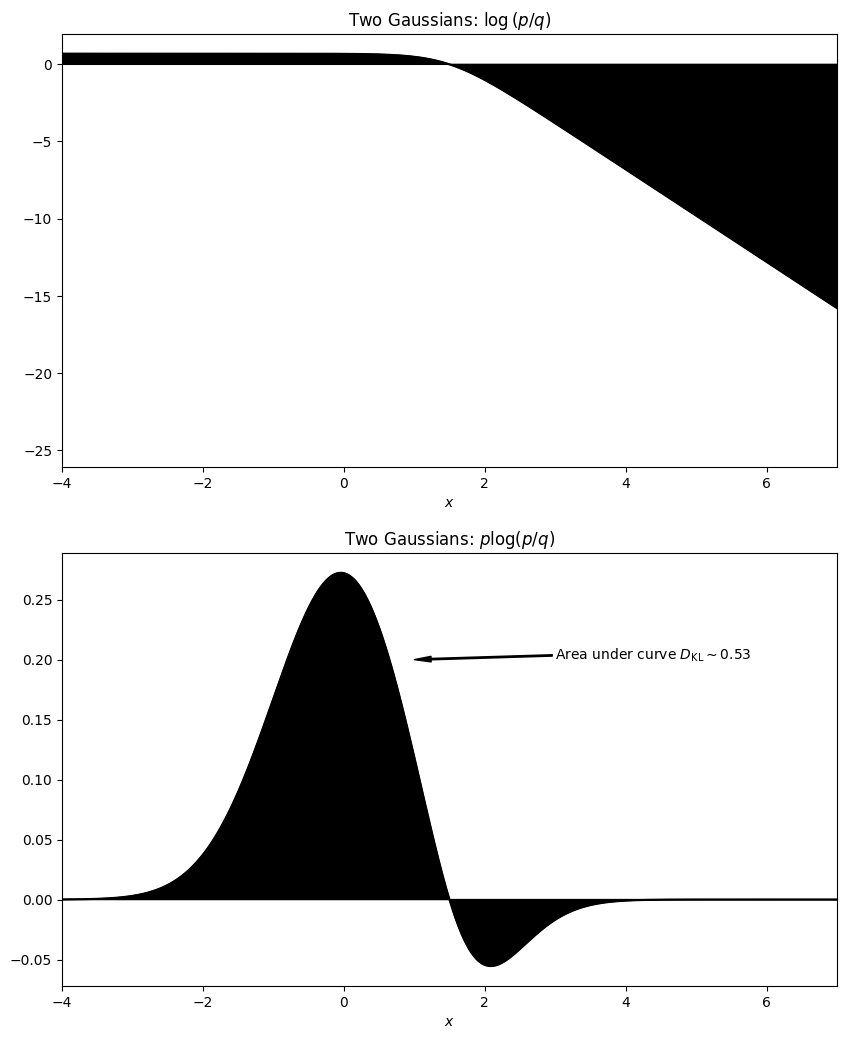

In [21]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(10,2*6.18))

ax[0].plot(x, np.log(y/y_b), color="k")

ax[0].fill_between(x, np.log(y/y_b), color="k")

ax[0].set_xlim([-4,7])
ax[0].set_xlabel("$x$")
ax[0].set_title(r"Two Gaussians: $\log\left(p/q\right)$")

ax[1].plot(x, y*np.log(y/y_b), color="k")

ax[1].fill_between(x, y*np.log(y/y_b), color="k")

ax[1].set_xlim([-4,7])
ax[1].set_xlabel("$x$")
ax[1].set_title("Two Gaussians: $p \log(p/q)$")

ax[1].annotate(r'Area under curve $D_\mathrm{KL} \sim 0.53$', xy=(1, 0.2), xytext=(3, 0.2),
            arrowprops=dict(color='k', shrink=0.001, width=1, headwidth=4),
            color="k"
           )


plt.savefig("assets/kl-divergence/guassian-mixture-integrants.png")

In [22]:
np.sum(
    ((x.max() - x.min())/len(x))*y*np.log(y/y_b)
)

0.5267246287907213

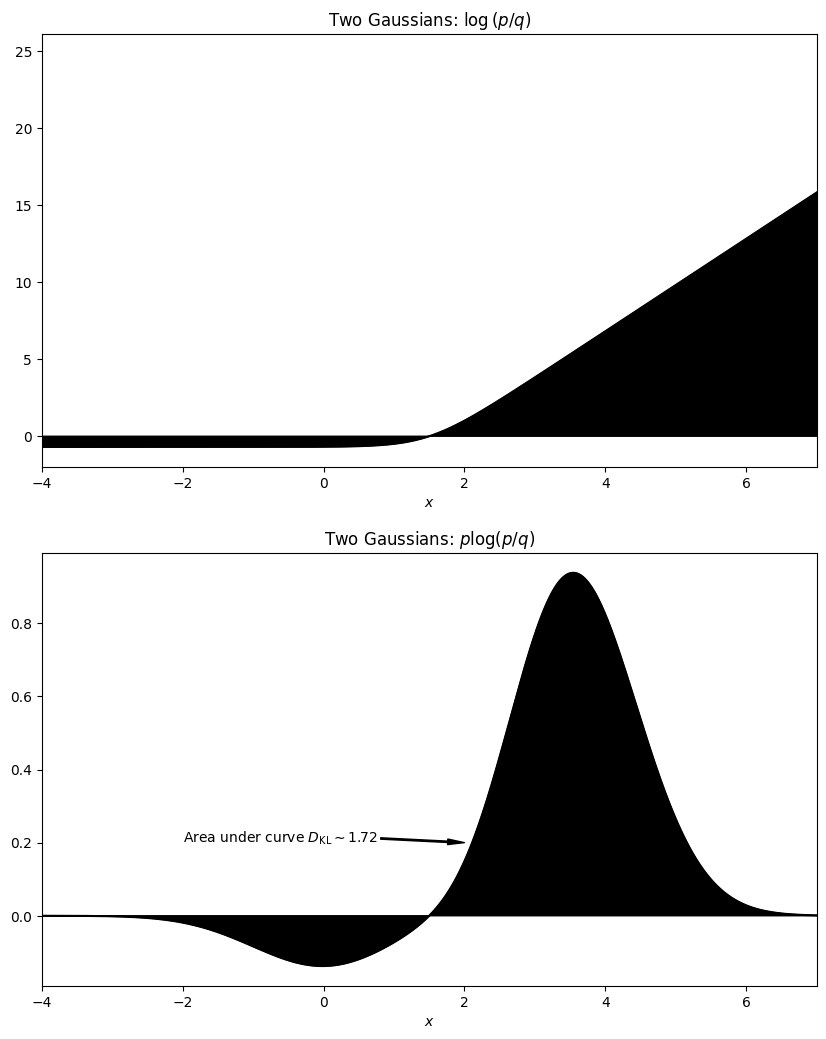

In [23]:
fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(10,2*6.18))

ax[0].plot(x, np.log(y_b/y), color="k")

ax[0].fill_between(x, np.log(y_b/y), color="k")

ax[0].set_xlim([-4,7])
ax[0].set_xlabel("$x$")
ax[0].set_title(r"Two Gaussians: $\log\left(p/q\right)$")

ax[1].plot(x, y_b*np.log(y_b/y), color="k")

ax[1].fill_between(x, y_b*np.log(y_b/y), color="k")

ax[1].set_xlim([-4,7])
ax[1].set_xlabel("$x$")
ax[1].set_title("Two Gaussians: $p \log(p/q)$")

ax[1].annotate(r'Area under curve $D_\mathrm{KL} \sim 1.72$', xy=(2, 0.2), xytext=(-2, 0.2),
            arrowprops=dict(color='k', shrink=0.001, width=1, headwidth=4),
            color="k"
           )

plt.savefig("assets/kl-divergence/guassian-mixture-integrants-d-q-p.png")

In [24]:
np.sum(
    ((x.max() - x.min())/len(x))*y_b*np.log(y_b/y)
)

1.7230503711932554

Move the mixture leftward

In [233]:
y_c = stats.norm.pdf(x)/2 + stats.norm.pdf(x, -3)/2

(-6.0, 3.0)

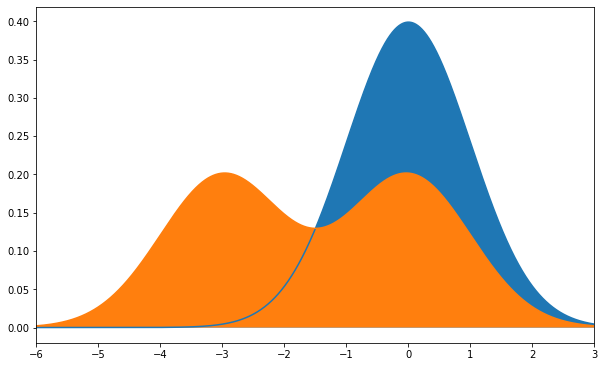

In [234]:
fig, ax = plt.subplots(figsize=(10,6.18))

ax.plot(x, y)
ax.plot(x, y_c)

ax.fill_between(x, y)
ax.fill_between(x, y_c)

ax.set_xlim([-6,3])

In [235]:
stats.entropy(y, y_c)

0.5267773065207381

In [236]:
stats.entropy(y_c, y)

1.723222693464332